<a href="https://colab.research.google.com/github/Chirag314/Creditcard-Logistic-regression/blob/main/UCL_creditcard_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [9]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDRegressor,SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score,roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter04/Logistic%20Regression/UCI_Credit_Card.csv'
df_creditdata = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_creditdata.head(5))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   

In [3]:
print(df_creditdata.shape)

(30000, 25)


In [4]:
# Check the variables and their types
df_creditdata.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [5]:
#We will drop the ID column as we do not need this here:
df_creditdata.drop(['ID'],axis=1,inplace=True)

In [6]:
# Check if there is any null values
df_creditdata.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#####There are no null values in any of the features.

In [11]:
# Split features and response variables
X=df_creditdata.iloc[:,0:23]
Y=df_creditdata['default.payment.next.month']

# Create train and test set
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3,random_state=42)

In [12]:
#We standardize our predictor variables using StandardScaler():
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
# Create model with SGDClassifier
logistic_model=SGDClassifier(alpha=0.000001,loss='log', max_iter=100000,penalty='l2')

#We fit our model to the data
fitted_model=logistic_model.fit(X_train,Y_train)

#Prediction
predictedvalues=fitted_model.predict_proba(X_test)

#Print probabilities
predictedvalues


array([[0.67339482, 0.32660518],
       [0.78211552, 0.21788448],
       [0.94179475, 0.05820525],
       ...,
       [0.88300912, 0.11699088],
       [0.99039204, 0.00960796],
       [0.99765132, 0.00234868]])

In [16]:
# LEts check probabilities of one class
# Separate values of class1
Y_predicted=predictedvalues[:,1]

# # We check to see if the right values have been considered from the predicted values
print(Y_predicted)

[0.32660518 0.21788448 0.05820525 ... 0.11699088 0.00960796 0.00234868]


In [17]:
# CHeck model accuracy
logistic_model.score(X_test,Y_test)

0.7726666666666666

In [18]:
#We can then see the area under curve (AUC) value of the receiver operating characteristic (ROC) curve:
# We us
fpr, tpr,thresholds=roc_curve(Y_test, Y_predicted)

# We pass fpr and tpr values to auc to calculate area under curve
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.6528476490027829


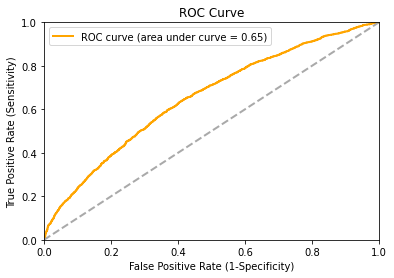

In [22]:
#plot roc_curve
plt.figure()
plt.plot(fpr,tpr, color='orange', lw=2, label='ROC curve (area under curve = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.show()